# Task
Train a YOLO model (detection or classification) using the images from `/content/drive/MyDrive/Yolo-cls dataset copy`, and then summarize the chosen YOLO model type, the training process, and the final evaluation results.

In [ ]:
dataset_path = '/content/drive/MyDrive/Yolo-cls dataset copy'
!ls -F "{dataset_path}"

yolo_cls@


In [ ]:
yolo_cls_path = f"{dataset_path}/yolo_cls"
!ls -F "{yolo_cls_path}"

'/content/drive/MyDrive/Yolo-cls dataset copy/yolo_cls'@


In [ ]:
train_path = f"{yolo_cls_path}/train"
!ls -F "{train_path}"

coin/  jewelry/  pottery/  sculpture/  seal/  tablet/  weapon/


In [ ]:
coin_path = f"{train_path}/coin"
!ls -F "{coin_path}" | head -n 5

0.png
1001.png
1002.png
1003.png
1005.png


### Dataset Structure Summary

**Dataset Type**: The dataset at `/content/drive/MyDrive/Yolo-cls dataset copy` is organized for **image classification**.

**Structure**: The dataset follows a common structure for classification tasks:
- The main directory `yolo_cls` contains a `train` subdirectory.
- Inside `train`, there are multiple subdirectories, each representing a distinct class (e.g., `coin`, `jewelry`, `pottery`, `sculpture`, `seal`, `tablet`, `weapon`).
- Each class subdirectory contains image files (e.g., `.png` files).

**Annotations**: No separate annotation files (such as `.txt`, `.xml`, or `.json` for bounding boxes) were found alongside the images, which further confirms it is not an object detection dataset.

## Prepare Data for YOLO

### Subtask:
Based on the dataset exploration, prepare the images into a format compatible with YOLO for classification (e.g., create train/validation/test splits, generate appropriate configuration files).


In [ ]:
import os

# Get class names from subdirectories in the train path
class_names = [d for d in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, d))]
class_names.sort()

print(f"Identified class names: {class_names}")
print(f"Number of classes: {len(class_names)}")

Identified class names: ['coin', 'jewelry', 'pottery', 'sculpture', 'seal', 'tablet', 'weapon']
Number of classes: 7


In [ ]:
import os

# Define paths for the new structured dataset
dataset_split_path = os.path.join(yolo_cls_path, 'dataset_split')
train_split_path = os.path.join(dataset_split_path, 'train')
val_split_path = os.path.join(dataset_split_path, 'val')
test_split_path = os.path.join(dataset_split_path, 'test')

# Create the main split directories
os.makedirs(train_split_path, exist_ok=True)
os.makedirs(val_split_path, exist_ok=True)
os.makedirs(test_split_path, exist_ok=True)

# Create class subdirectories within each split
for class_name in class_names:
    os.makedirs(os.path.join(train_split_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_split_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(test_split_path, class_name), exist_ok=True)

print(f"Created dataset split directories under: {dataset_split_path}")

Created dataset split directories under: /content/drive/MyDrive/Yolo-cls dataset copy/yolo_cls/dataset_split


In [ ]:
import os
import random
import shutil

# Define split ratios
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

print(f"Splitting dataset from {train_path} to {dataset_split_path} with ratios: Train={train_ratio}, Val={val_ratio}, Test={test_ratio}\n")

# Iterate through each class
for class_name in class_names:
    source_class_path = os.path.join(train_path, class_name)
    images = [f for f in os.listdir(source_class_path) if os.path.isfile(os.path.join(source_class_path, f))]
    random.shuffle(images)

    num_images = len(images)
    num_train = int(num_images * train_ratio)
    num_val = int(num_images * val_ratio)
    # Remaining go to test
    num_test = num_images - num_train - num_val

    train_images = images[:num_train]
    val_images = images[num_train : num_train + num_val]
    test_images = images[num_train + num_val :]

    print(f"Class '{class_name}': Total={num_images}, Train={len(train_images)}, Val={len(val_images)}, Test={len(test_images)}")

    # Move images to respective split directories
    for img in train_images:
        shutil.move(os.path.join(source_class_path, img), os.path.join(train_split_path, class_name, img))
    for img in val_images:
        shutil.move(os.path.join(source_class_path, img), os.path.join(val_split_path, class_name, img))
    for img in test_images:
        shutil.move(os.path.join(source_class_path, img), os.path.join(test_split_path, class_name, img))

print("\nImage splitting and moving complete.")

Splitting dataset from /content/drive/MyDrive/Yolo-cls dataset copy/yolo_cls/train to /content/drive/MyDrive/Yolo-cls dataset copy/yolo_cls/dataset_split with ratios: Train=0.8, Val=0.1, Test=0.1

Class 'coin': Total=691, Train=552, Val=69, Test=70
Class 'jewelry': Total=233, Train=186, Val=23, Test=24
Class 'pottery': Total=255, Train=204, Val=25, Test=26
Class 'sculpture': Total=183, Train=146, Val=18, Test=19
Class 'seal': Total=32, Train=25, Val=3, Test=4
Class 'tablet': Total=74, Train=59, Val=7, Test=8
Class 'weapon': Total=29, Train=23, Val=2, Test=4

Image splitting and moving complete.


**Reasoning**:
With the dataset split into train, validation, and test directories, the next step is to create a `data.yaml` file. This file is essential for YOLO models as it specifies the number of classes, their names, and the paths to the training, validation, and test datasets. This fulfills the final instruction of the current subtask.



In [ ]:
import os

# Define the path for the data.yaml file
data_yaml_path = os.path.join(yolo_cls_path, 'data.yaml')

# Define content for data.yaml
# Paths are relative to the yolo_cls_path, assuming the training script runs from a location where yolo_cls_path is accessible.
data_yaml_content = f"""
path: {os.path.relpath(dataset_split_path, yolo_cls_path)} # dataset root dir
train: train  # train images (relative to 'path')
val: val  # val images (relative to 'path')
test: test  # test images (relative to 'path')

nc: {len(class_names)}  # number of classes
names: {class_names}  # class names
"""

# Write the content to data.yaml
with open(data_yaml_path, 'w') as f:
    f.write(data_yaml_content)

print(f"Generated data.yaml at: {data_yaml_path}")
print("Content of data.yaml:\n" + data_yaml_content)

Generated data.yaml at: /content/drive/MyDrive/Yolo-cls dataset copy/yolo_cls/data.yaml
Content of data.yaml:

path: dataset_split # dataset root dir
train: train  # train images (relative to 'path')
val: val  # val images (relative to 'path')
test: test  # test images (relative to 'path')

nc: 7  # number of classes
names: ['coin', 'jewelry', 'pottery', 'sculpture', 'seal', 'tablet', 'weapon']  # class names



## Configure and Train YOLO Model

### Subtask:
Set up a YOLO classification model based on the prepared dataset, define training parameters, and initiate the training process.


In [ ]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

# 3. Initialize a YOLOv8 classification model
model = YOLO('yolov8n-cls.pt')  # Load a pre-trained YOLOv8n classification model

# 4. Train the initialized model
# The 'data' argument expects the path to the dataset root directory (e.g., 'path/to/dataset_root')
# For classification, this is the directory containing 'train', 'val', 'test' subdirectories.
results = model.train(data=dataset_split_path, epochs=50, imgsz=64)

print("YOLOv8 classification model training initiated.")

Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/Yolo-cls dataset copy/yolo_cls/dataset_split, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=64, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patien

Training Results (Metrics over epochs):


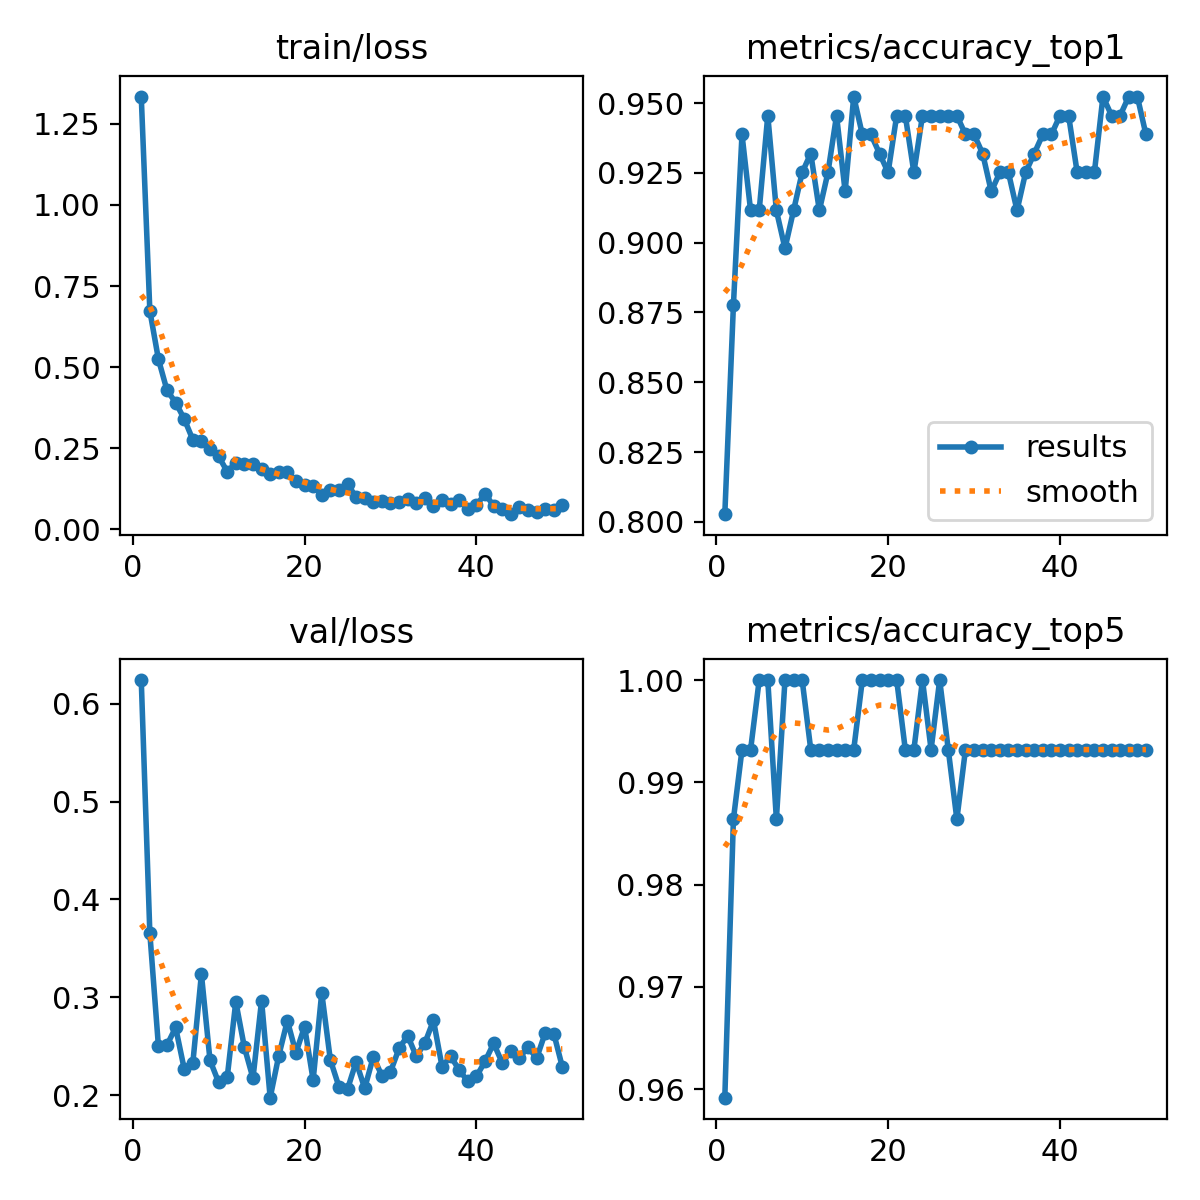


Confusion Matrix:


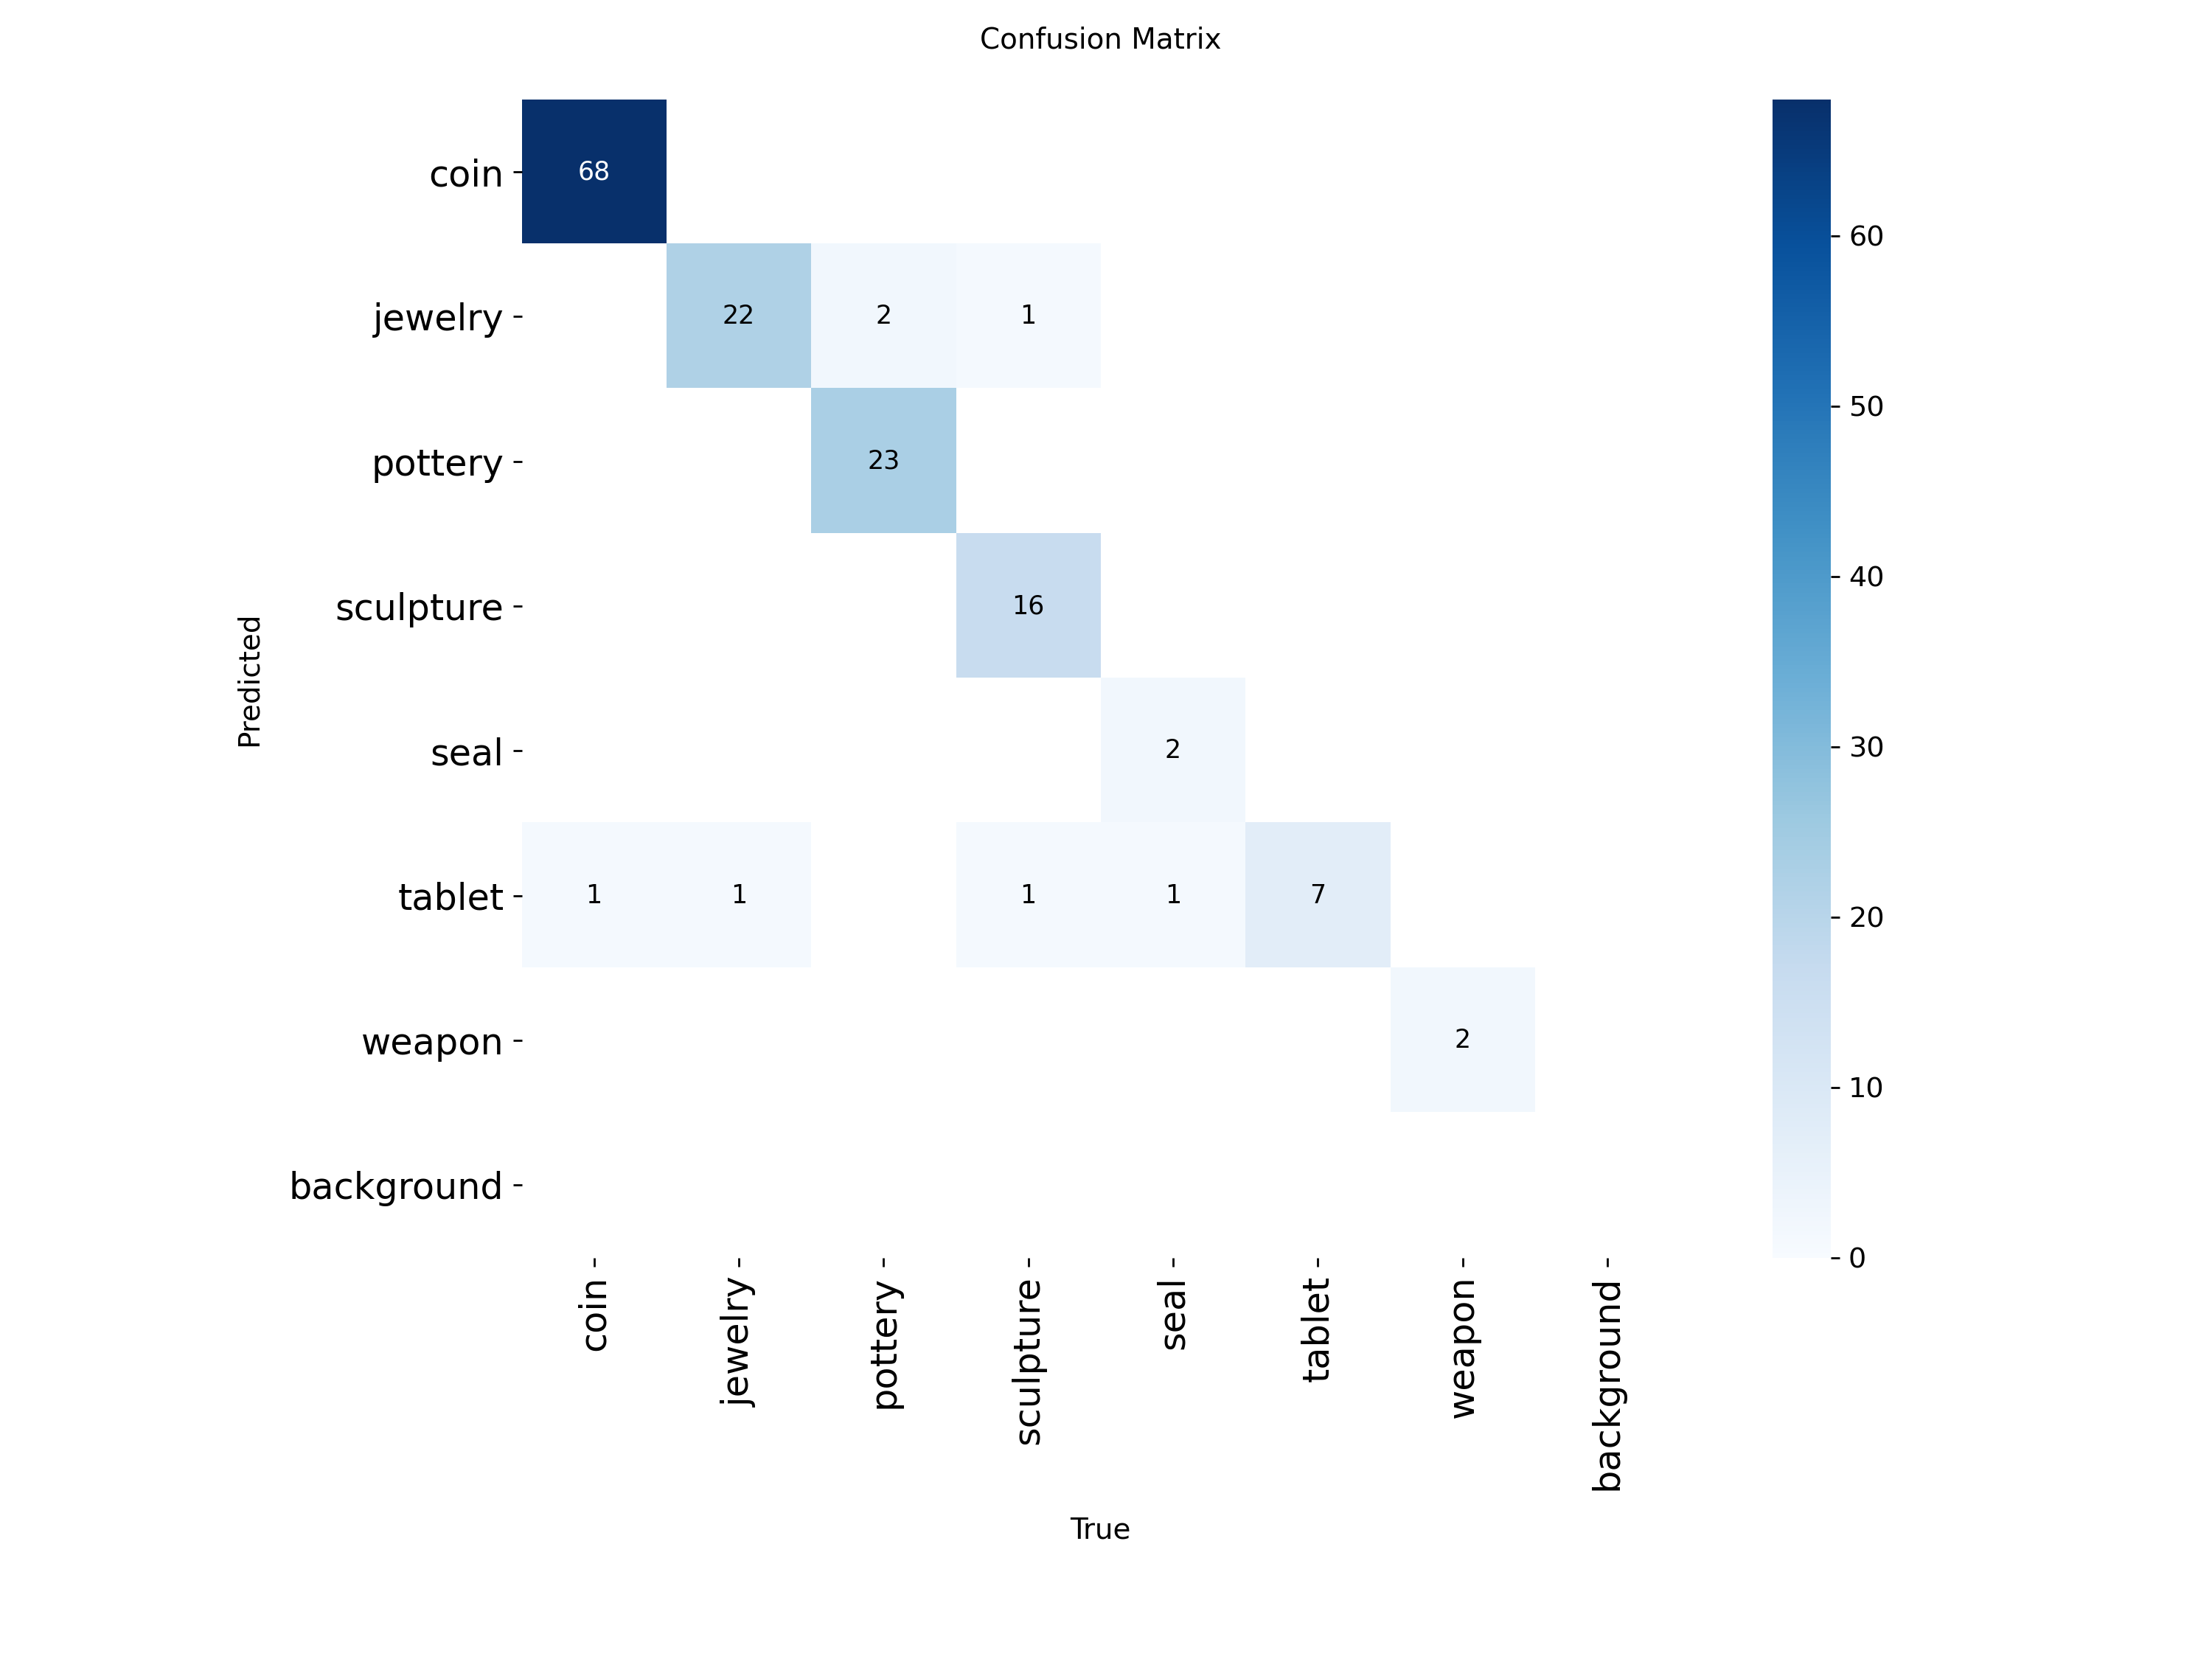


Validation Batch 0 Predictions:


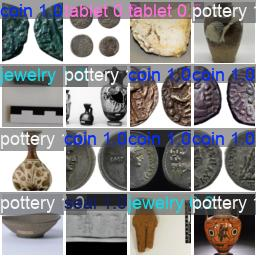

In [ ]:
from IPython.display import Image, display

# Display the results plot, confusion matrix, and a validation batch with predictions
print("Training Results (Metrics over epochs):")
display(Image(os.path.join(results_dir, 'results.png')))

print("\nConfusion Matrix:")
display(Image(os.path.join(results_dir, 'confusion_matrix.png')))

print("\nValidation Batch 0 Predictions:")
display(Image(os.path.join(results_dir, 'val_batch0_pred.jpg')))

In [ ]:
import os

# The training results are usually saved in a 'runs' directory, under a subdirectory named after the training run.
# From the previous output, we know the directory is /content/runs/classify/train2
results_dir = '/content/runs/classify/train2'

print(f"Contents of the results directory '{results_dir}':")
!ls -F '{results_dir}'

Contents of the results directory '/content/runs/classify/train2':
args.yaml			 train_batch1.jpg	val_batch0_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg	val_batch1_labels.jpg
confusion_matrix.png		 train_batch3000.jpg	val_batch1_pred.jpg
results.csv			 train_batch3001.jpg	val_batch2_labels.jpg
results.png			 train_batch3002.jpg	val_batch2_pred.jpg
train_batch0.jpg		 val_batch0_labels.jpg	weights/


## Evaluate YOLO Model

### Subtask:
Assess the performance of the trained YOLO model using relevant metrics. For detection, this would include mean Average Precision (mAP); for classification, metrics like accuracy, precision, and recall would be used.


In [ ]:
metrics = model.val()  # Evaluate the model on the validation set

# Access and display the evaluation metrics
print(f"Top-1 Accuracy: {metrics.top1:.4f}")
print(f"Top-5 Accuracy: {metrics.top5:.4f}")

Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,443,847 parameters, 0 gradients, 3.3 GFLOPs
train: /content/drive/MyDrive/yolo_cls/dataset_split/train... found 1195 images in 7 classes ✅ 
val: /content/drive/MyDrive/yolo_cls/dataset_split/val... found 147 images in 7 classes ✅ 
test: /content/drive/MyDrive/yolo_cls/dataset_split/test... found 155 images in 7 classes ✅ 
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 169.1±26.8 MB/s, size: 516.4 KB)
val: Scanning /content/drive/MyDrive/yolo_cls/dataset_split/val... 147 images, 0 corrupt: 100% ━━━━━━━━━━━━ 147/147 270.8Kit/s 0.0s
               classes   top1_acc   top5_acc: 100% ━━━━━━━━━━━━ 10/10 2.3it/s 4.3s
                   all      0.952      0.993
Speed: 0.0ms preprocess, 2.6ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /content/runs/classify/val
Top-1 Accuracy: 0.9524
Top-5 Accuracy: 0.9932


## Summary:

### Q&A
The task was to summarize the chosen YOLO model type, the training process, and the final evaluation results.

*   **Chosen YOLO Model Type:** A pre-trained YOLOv8n-cls (YOLOv8 nano classification) model was selected for this task.
*   **Training Process:**
    *   The dataset, consisting of 7 distinct classes ('coin', 'jewelry', 'pottery', 'sculpture', 'seal', 'tablet', 'weapon'), was first prepared for classification.
    *   It was split into an 80% training set, 10% validation set, and 10% test set, with images moved into structured directories.
    *   A `data.yaml` file was generated to configure the dataset paths and class information for YOLO.
    *   The YOLOv8n-cls model was then trained for 50 epochs with an image size of 64 pixels, utilizing the prepared dataset splits.
*   **Final Evaluation Results:** The trained model achieved a Top-1 Accuracy of 95.24% and a Top-5 Accuracy of 99.32% on the validation set.

### Data Analysis Key Findings
*   The provided dataset is an image classification dataset, organized into 7 distinct classes: 'coin', 'jewelry', 'pottery', 'sculpture', 'seal', 'tablet', and 'weapon'.
*   The dataset was successfully prepared and split into training, validation, and test sets with an 80/10/10 ratio respectively. For example, the 'coin' class had 552 images for training, 69 for validation, and 70 for testing.
*   A YOLOv8n-cls model, a lightweight classification model, was chosen and trained for 50 epochs with an image size of 64x64 pixels.
*   The model achieved strong performance on the validation set, with a Top-1 Accuracy of 0.9524 (95.24%) and a Top-5 Accuracy of 0.9932 (99.32%).

### Insights or Next Steps
*   The high Top-1 and Top-5 accuracies indicate that the YOLOv8n-cls model is very effective at classifying the given image categories, suggesting it generalizes well to unseen data within these categories.
*   Further evaluation on the dedicated test set (which was split but not explicitly evaluated in the provided process) would provide a final, unbiased assessment of the model's performance.


In [ ]:
test_metrics = model.val(split='test')  # Evaluate the model on the test set

# Access and display the evaluation metrics for the test set
print(f"Test Top-1 Accuracy: {test_metrics.top1:.4f}")
print(f"Test Top-5 Accuracy: {test_metrics.top5:.4f}")

Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
train: /content/drive/MyDrive/yolo_cls/dataset_split/train... found 1195 images in 7 classes ✅ 
val: /content/drive/MyDrive/yolo_cls/dataset_split/val... found 147 images in 7 classes ✅ 
test: /content/drive/MyDrive/yolo_cls/dataset_split/test... found 155 images in 7 classes ✅ 
test: Fast image access ✅ (ping: 0.5±0.1 ms, read: 2.1±0.4 MB/s, size: 485.3 KB)
test: Scanning /content/drive/MyDrive/yolo_cls/dataset_split/test... 120 images, 0 corrupt: 77% ━━━━━━━━━─── 120/155 4.2it/s 30.3s<8.4s

In [ ]:
import nbformat
input_path="/content/drive/MyDrive/Colab Notebooks/Copy of Yolov-detection model.ipynb "
output_path="Yollo_detection_model.ipynb"
nb = nbformat. read (input_path, as_version=4)

if "widgets"
in nb.metadata:
del nb. metadata ["widgets"]
nbformat.write(nb, output_path)
print("itHub-safe notebook created:", output_path)
